In [ ]:
%run encode+scale.ipynb

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),  # hidden layer 1
    Dense(8, activation='relu'),                   # hidden layer 2
    Dense(3, activation='softmax')                 # output layer (3 classes)
])

c:\Users\gokul\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8,
                    validation_split=0.2, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5833 - loss: 0.9935 - val_accuracy: 0.6667 - val_loss: 0.9423
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6354 - loss: 0.9569 - val_accuracy: 0.7083 - val_loss: 0.9213
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6354 - loss: 0.9213 - val_accuracy: 0.7083 - val_loss: 0.8911
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6458 - loss: 0.8821 - val_accuracy: 0.7083 - val_loss: 0.8591
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.8419 - val_accuracy: 0.7083 - val_loss: 0.8246
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6771 - loss: 0.7990 - val_accuracy: 0.7500 - val_loss: 0.7864
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6979 - loss: 0.7582 - val_accuracy: 0.7917 - val_loss: 0.7465
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7083 - loss: 0.7180 - val_accuracy: 0.7917 - val_los

In [6]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 96.67%


In [8]:
import matplotlib.pyplot as plt

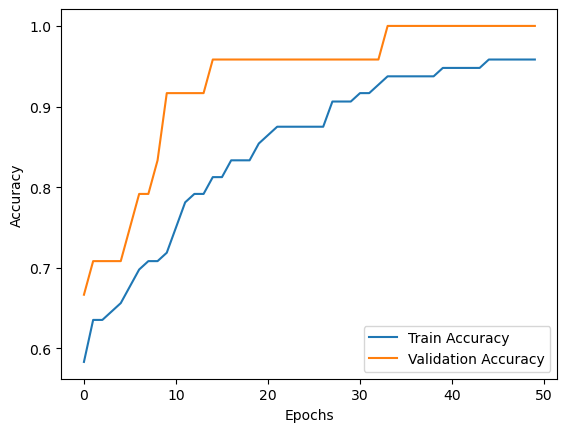

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

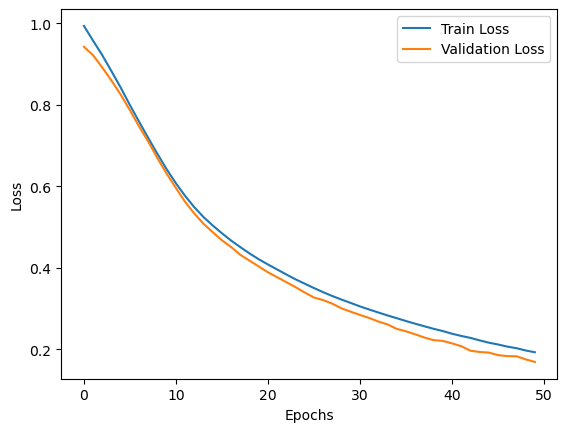

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


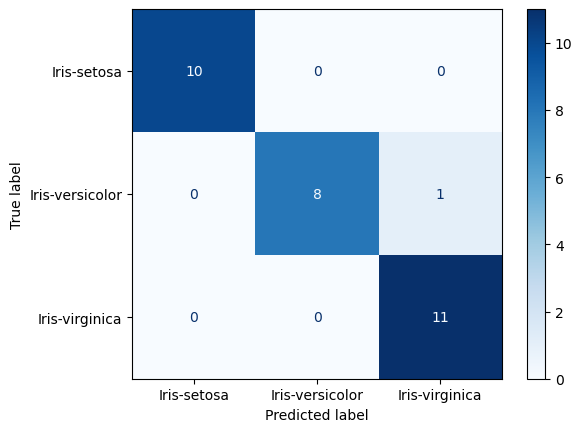

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=encoder.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [14]:
model.save("../artifacts/iris_ann.h5")
loaded_model = tf.keras.models.load_model("../artifacts/iris_ann.h5")